# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

In [3]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

The dataframe is not balanced. 91.26% of the data is non fraud data.

- **2.** Train a LogisticRegression.

In [5]:
features = df.drop(columns='fraud')
target = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np = scaler.transform(X_test)

log_reg = LogisticRegression()

X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

log_reg.fit(X_train_scaled_df, y_train)



LogisticRegression()

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [7]:
log_reg.score(X_test_scaled_df, y_test)

0.95922

In [8]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [9]:
over = RandomOverSampler(random_state=0)
X_train_over, y_train_over = over.fit_resample(X_train,y_train)

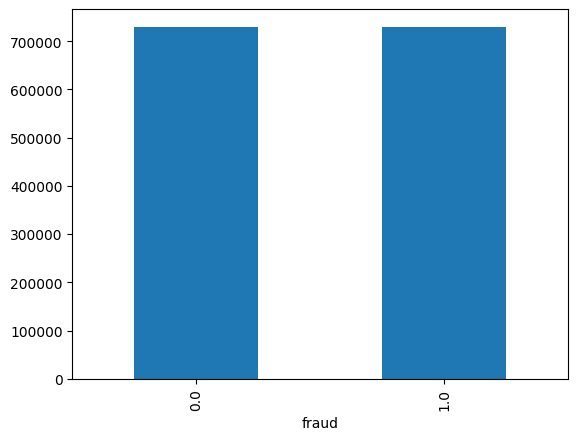

In [10]:
y_train_over.value_counts().plot(kind="bar")
plt.show()

In [11]:
log_reg_over = LogisticRegression()
log_reg_over.fit(X_train_over, y_train_over)
y_pred_test_log_over = log_reg_over.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log_over, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    182615
         1.0       0.48      0.46      0.47     17385

    accuracy                           0.91    200000
   macro avg       0.72      0.71      0.71    200000
weighted avg       0.91      0.91      0.91    200000



c:\Users\jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No, the model did not improve with the Oversampling. There's a decrease in all indicators when compared to the unbalanced data.

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [12]:
under = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = under.fit_resample(X_train,y_train)

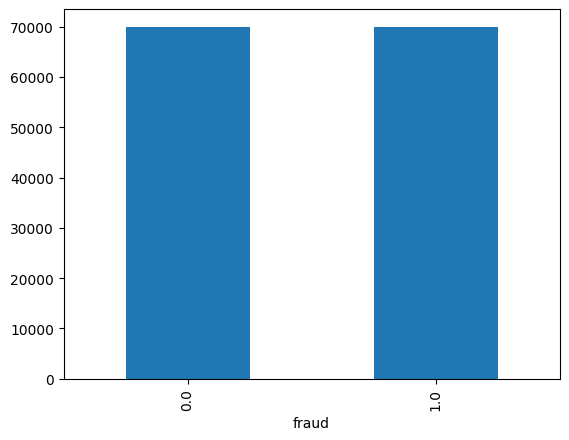

In [13]:
y_train_under.value_counts().plot(kind="bar")
plt.show()

In [14]:
log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_under, y_train_under)
y_pred_test_log_under = log_reg_under.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log_under, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95    182615
         1.0       0.43      0.46      0.45     17385

    accuracy                           0.90    200000
   macro avg       0.69      0.70      0.70    200000
weighted avg       0.90      0.90      0.90    200000



c:\Users\jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))
# print(classification_report(y_pred = y_pred_test_log_over, y_true = y_test))
print(classification_report(y_pred = y_pred_test_log_under, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95    182615
         1.0       0.43      0.46      0.45     17385

    accuracy                           0.90    200000
   macro avg       0.69      0.70      0.70    200000
weighted avg       0.90      0.90      0.90    200000



No, there's no improvement when compared to the unbalanced model.

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [16]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_smote, y_train_smote =  sm.fit_resample(X_train,y_train)

In [17]:
log_reg_SMOTE = LogisticRegression()
log_reg_SMOTE.fit(X_train_smote, y_train_smote)
y_pred_test_log_SMOTE = log_reg_SMOTE.predict(X_test)
print(classification_report(y_pred = y_pred_test_log_SMOTE, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.58      0.94      0.72     17385

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



c:\Users\jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE did improve the precision, recall and f1 score of the model. 